In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib'))
import os
# if not os.getcwd().endswith('VAD-Humbug'):
#   os.chdir('../lib/VAD-Humbug')
from VAD_pipeline import VAD_pipeline
import matplotlib.pyplot as plt

import pickle
import util
import librosa
import numpy as np
import soundfile as sf
import ipdb

from scipy.signal import medfilt

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# VAD

# Load model for detection

## Deep learning (skip if keras/tensorflow not installed)

In [2]:
from tensorflow import keras
model = keras.models.load_model('../models/BNN/Win_40_Stride_5_CNN_log-mel_128_norm_Falseheld_out_test_manual_v2_low_epoch.h5',
                               custom_objects={"dropout": 0.2})
model_name = 'held_out_test_manual_v2_low_epoch'
win_size=40
step_size=40
feat_type='log-mel'
n_feat=128

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ikiskin

In [3]:
def get_wav_for_path(noise_path_names, sr):
    x = []
    signal_length = 0
    for path in noise_path_names:
#         print(path)
        signal, _ = librosa.load(path, sr=sr)
        x.append(signal)
        signal_length += len(signal)/sr
    return x, signal_length

## Random Forest prediction

In [56]:
model_name = 'clf_CDC_mfcc-cut20'
with open('../models/' + model_name + '.pickle', 'rb') as handle:
    clf = pickle.load(handle)

2020-11-09_18.59.09.243.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1800/2020-11-09_18.59.09.243.wav
[[424.576, 424.96, '0.60'], [425.216, 425.344, '0.57'], [940.416, 940.864, '0.99'], [1256.064, 1256.192, '0.51'], [1452.032, 1452.48, '0.96'], [1462.464, 1463.36, '0.84'], [1753.536, 1753.728, '0.59']]


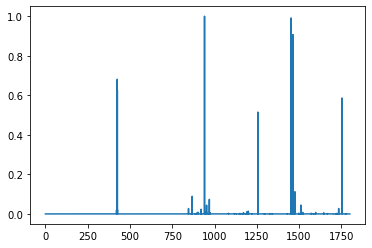

2020-11-09_19.29.14.337.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1900/2020-11-09_19.29.14.337.wav
[]


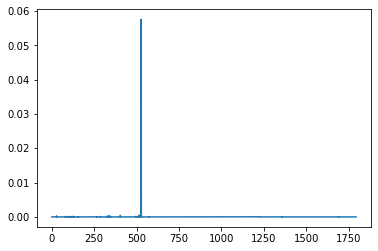

2020-11-09_19.59.14.331.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1900/2020-11-09_19.59.14.331.wav
[]


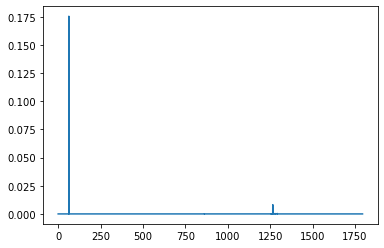

2020-11-09_20.29.14.359.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2000/2020-11-09_20.29.14.359.wav
[]


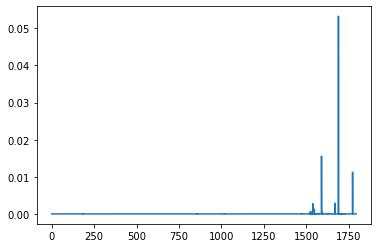

2020-11-09_20.59.14.355.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2000/2020-11-09_20.59.14.355.wav
[[1746.368, 1746.752, '0.84']]


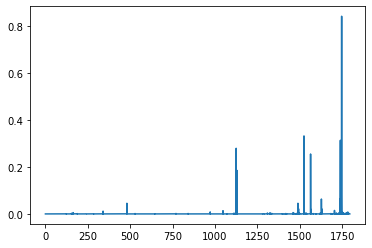

2020-11-09_21.29.14.391.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2100/2020-11-09_21.29.14.391.wav
[]


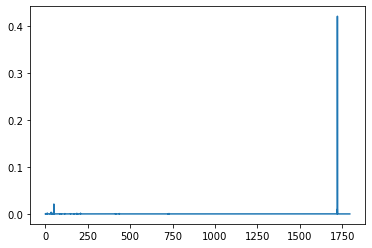

2020-11-09_21.59.14.342.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2100/2020-11-09_21.59.14.342.wav
[]


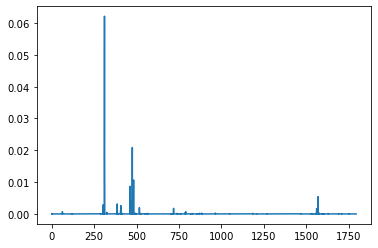

2020-11-09_22.29.14.343.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2200/2020-11-09_22.29.14.343.wav
[[326.528, 326.976, '0.97']]


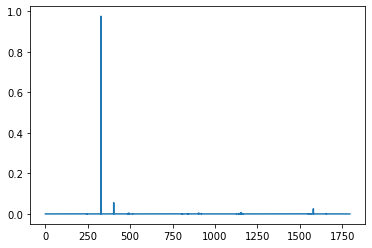

2020-11-09_22.59.14.358.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2200/2020-11-09_22.59.14.358.wav
[[40.448, 40.832, '0.94']]


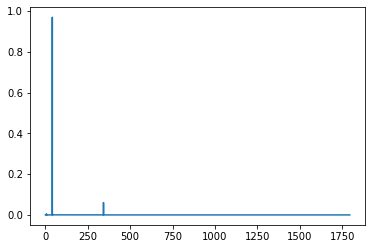

2020-11-09_23.29.14.358.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2300/2020-11-09_23.29.14.358.wav
[]


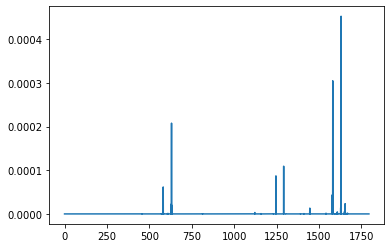

2020-11-09_23.59.14.396.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2300/2020-11-09_23.59.14.396.wav
[]


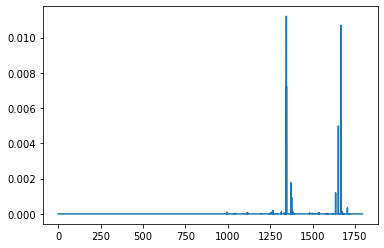

In [61]:
sr = 8000
to_filter = True
kernel_size = 11

directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/'
subdirectories = ['1800', '0019', '2000', '2100', '2200', '2300']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/'


for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = get_wav_for_path([directory + subdir + '/' + filename], sr =8000)
            X = util.get_feat(x, sr=8000, feat_type='mfcc-cut', flatten = True, n_feat=20)
           
            preds_prob = clf.predict_proba(X)
            
            if to_filter:
                preds_filt = np.zeros([len(preds_prob),2])
                preds_filt[:,1] = medfilt(preds_prob[:,1], kernel_size=kernel_size)
                preds_filt[:,0] = 1 - preds_prob[:,1]
                preds_prob = preds_filt
          
            preds_list = util.detect_timestamps(preds_prob)
            
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(preds_prob)), hop_length=512),
                                               preds_prob[:,1])
            print(preds_list)
            plt.show()

            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
#             with open(dir_out + subdir + '/mozz_pred_list' + filename + '.pkl', 'wb') as f:
#                 pickle.dump(preds_list, f)
            np.savetxt(dir_out + subdir + '/' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# BNN prediction

In [8]:
rootFolderPath = 'F:\PostdocData\HumBugServer\SemiFieldDataTanzania'
audio_format = '.wav'
dir_out = None  # None if we want to save files in the same folder that we read from



#CNN:
to_filter = False
norm = False
step_size= 40
debug= False
n_samples = 10
n_hop = 512
sr = 8000
win_size = 40


#Experimental
mozz_audio_list = []
det_threshold = 0.5

i_signal = 0
for root, dirs, files in os.walk(rootFolderPath):
    for filename in files:

        if filename.endswith(audio_format):
            print(root, filename) 
            i_signal+=1
    
            x, x_l = get_wav_for_path([os.path.join(root, filename)], sr =8000)
            if debug:
                print(filename + ' signal length', x_l)
            if x_l < (n_hop * win_size)/sr: 
                print('Signal length too short, skipping:', x_l, filename) 
            else:
    #             
                X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False)

                X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
    #             X_CNN = (X_CNN - mean)/std
    #             print(np.shape(X_CNN))

                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))

                G_X, U_X, _ = util.active_BALD(np.log(out), X_CNN, 2)
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0), det_threshold=det_threshold)   

                if to_filter:
                    preds_filt = np.zeros([len(preds_CNN),2])
                    preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                    preds_filt[:,0] = 1 - preds_filt[:,1]
                    preds_CNN = preds_filt

                if debug:
                    print(preds_list)
                    for times in preds_list:
                        mozz_audio_list.append(librosa.load(os.path.join(root, filename), offset=float(times[0]),
                                                             duration=float(times[1])-float(times[0]), sr=sr)[0])
#                     plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
#                                                    np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
#                     plt.xlabel('Seconds')
#                     plt.ylabel('Mean probability (mozz)')
#                     plt.show()


                dir_out = root

                if not os.path.exists(dir_out): os.makedirs(dir_out)
                np.savetxt(dir_out + '/' + filename + '_BNN_step_' + str(step_size) + '_samples_' + str(n_samples) + '_'
                           + str(model_name) + '.txt', preds_list, fmt='%s', delimiter='\t')


print('Total files of ' + str(audio_format) + ' format processed:', i_signal)


F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\1800 2020-11-16_18.53.12.357.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\1900 2020-11-16_19.23.17.475.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\1900 2020-11-16_19.53.17.446.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\2000 2020-11-16_20.23.17.443.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\2000 2020-11-16_20.53.17.465.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\2100 2020-11-16_21.23.17.466.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\2100 2020-11-16_21.53.17.462.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-16_A1_30\2200 2020-11-16_22.23.17.446.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\1800 2020-11-19_18.53.16.411.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\1900 2020-11-19_19.23.21.509.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\1900 2020-11-19_19.53.21.500.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\2000 2020-11-19_20.23.21.540.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\2000 2020-11-19_20.53.21.495.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\2100 2020-11-19_21.23.21.526.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\2100 2020-11-19_21.53.21.513.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-19_A1_30\2200 2020-11-19_22.23.21.521.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\1900 2020-11-23_19.28.55.148.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\1900 2020-11-23_19.58.55.164.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\2000 2020-11-23_20.28.55.156.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\2000 2020-11-23_20.58.55.137.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\2100 2020-11-23_21.28.55.188.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\2100 2020-11-23_21.58.55.170.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\2200 2020-11-23_22.28.55.137.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-23_A1_100\2200 2020-11-23_22.58.55.162.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0100 2020-11-27_01.32.32.191.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0200 2020-11-27_02.02.32.182.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0200 2020-11-27_02.32.32.172.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0300 2020-11-27_03.02.32.200.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0300 2020-11-27_03.32.32.183.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0400 2020-11-27_04.02.32.189.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0400 2020-11-27_04.32.32.172.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2020-11-27_A1_100\0500 2020-11-27_05.02.32.175.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0100 2021-02-18_01.20.35.340.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0100 2021-02-18_01.50.35.340.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0200 2021-02-18_02.20.35.346.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0200 2021-02-18_02.50.35.329.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0300 2021-02-18_03.20.35.355.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0300 2021-02-18_03.50.35.336.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0400 2021-02-18_04.20.35.337.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-02-18_A1_70\0400 2021-02-18_04.50.35.315.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0000 2021-03-04_00.16.45.806.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0000 2021-03-04_00.46.45.804.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0100 2021-03-04_01.16.45.810.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0100 2021-03-04_01.46.45.823.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0200 2021-03-04_02.16.45.798.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0200 2021-03-04_02.46.45.793.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0300 2021-03-04_03.16.45.812.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-04_A1_50\0300 2021-03-04_03.46.45.791.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\0300 2021-03-07_03.47.13.300.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\0400 2021-03-07_04.17.13.307.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\0400 2021-03-07_04.47.13.314.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\0500 2021-03-07_05.17.13.302.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\0500 2021-03-07_05.47.13.311.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\1800 2021-03-07_18.47.59.886.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\1900 2021-03-07_19.18.04.996.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 1 (A1)\2021-03-07_A1_50\1900 2021-03-07_19.48.05.001.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-17_A2_30\2100 2020-11-17_21.32.46.718.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-17_A2_30\2200 2020-11-17_22.02.46.728.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-17_A2_30\2200 2020-11-17_22.32.46.713.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-17_A2_30\2300 2020-11-17_23.02.46.726.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-17_A2_30\2300 2020-11-17_23.32.46.727.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-18_A2_30\0000 2020-11-18_00.02.46.728.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-18_A2_30\0000 2020-11-18_00.32.46.732.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-18_A2_30\0100 2020-11-18_01.02.46.736.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-20_A2_30\2200 2020-11-20_22.05.58.161.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-20_A2_30\2200 2020-11-20_22.35.58.147.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-20_A2_30\2300 2020-11-20_23.05.58.156.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-20_A2_30\2300 2020-11-20_23.35.58.133.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-21_A2_30\0000 2020-11-21_00.05.58.148.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-21_A2_30\0000 2020-11-21_00.35.58.184.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-21_A2_30\0100 2020-11-21_01.05.58.174.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-21_A2_30\0100 2020-11-21_01.35.58.144.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-24_A2_100\2200 2020-11-24_22.31.18.538.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-24_A2_100\2300 2020-11-24_23.01.18.538.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-24_A2_100\2300 2020-11-24_23.31.18.517.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-25_A2_100\0000 2020-11-25_00.01.18.543.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-25_A2_100\0000 2020-11-25_00.31.18.544.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-25_A2_100\0100 2020-11-25_01.01.18.547.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-25_A2_100\0100 2020-11-25_01.31.18.516.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2020-11-25_A2_100\0200 2020-11-25_02.01.18.529.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-15_A2_70\2300 2021-02-15_23.03.46.678.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-15_A2_70\2300 2021-02-15_23.33.46.652.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-16_A2_70\0000 2021-02-16_00.03.46.661.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-16_A2_70\0000 2021-02-16_00.33.46.646.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-16_A2_70\0100 2021-02-16_01.03.46.650.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-16_A2_70\0100 2021-02-16_01.33.46.665.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-16_A2_70\0200 2021-02-16_02.03.46.645.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-16_A2_70\0200 2021-02-16_02.33.46.636.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-18_A2_70\2200 2021-02-18_22.20.48.607.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-18_A2_70\2200 2021-02-18_22.50.48.637.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-18_A2_70\2300 2021-02-18_23.20.48.644.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-18_A2_70\2300 2021-02-18_23.50.48.635.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-19_A2_70\0000 2021-02-19_00.20.48.651.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-19_A2_70\0000 2021-02-19_00.50.48.625.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-19_A2_70\0100 2021-02-19_01.20.48.633.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-02-19_A2_70\0100 2021-02-19_01.50.48.654.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0200 2021-03-05_02.50.54.682.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0300 2021-03-05_03.20.54.694.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0300 2021-03-05_03.50.54.677.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0400 2021-03-05_04.20.54.670.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0400 2021-03-05_04.50.54.688.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0500 2021-03-05_05.20.54.674.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\0500 2021-03-05_05.50.54.686.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-05_A2_50\1800 2021-03-05_18.42.31.975.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0000 2021-03-08_00.48.45.862.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0100 2021-03-08_01.18.45.862.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0100 2021-03-08_01.48.45.835.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0200 2021-03-08_02.18.45.858.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0200 2021-03-08_02.48.45.901.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0300 2021-03-08_03.18.45.850.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0300 2021-03-08_03.48.45.829.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 2 (A2)\2021-03-08_A2_50\0400 2021-03-08_04.18.45.834.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1400 2019-01-01_14.53.15.869.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1500 2019-01-01_15.23.15.873.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1500 2019-01-01_15.53.15.890.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1600 2019-01-01_16.23.15.886.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1600 2019-01-01_16.53.15.892.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1700 2019-01-01_17.23.15.891.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1700 2019-01-01_17.53.15.874.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-18_A3_30\1800 2019-01-01_18.23.15.878.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0000 2020-11-21_00.35.26.983.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0100 2020-11-21_01.05.26.992.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0100 2020-11-21_01.35.26.964.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0200 2020-11-21_02.05.26.962.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0200 2020-11-21_02.35.26.968.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0300 2020-11-21_03.05.26.972.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0300 2020-11-21_03.35.26.948.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-21_A3_30\0400 2020-11-21_04.05.26.957.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0100 2020-11-25_01.00.52.995.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0100 2020-11-25_01.30.53.012.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0200 2020-11-25_02.00.52.996.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0200 2020-11-25_02.30.53.021.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0300 2020-11-25_03.00.53.054.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0300 2020-11-25_03.30.53.000.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0400 2020-11-25_04.00.53.004.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2020-11-25_A3_100\0400 2020-11-25_04.30.53.000.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0100 2021-02-16_01.34.27.953.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0200 2021-02-16_02.04.27.976.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0200 2021-02-16_02.34.27.955.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0300 2021-02-16_03.04.27.972.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0300 2021-02-16_03.34.27.944.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0400 2021-02-16_04.04.27.962.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0400 2021-02-16_04.34.27.970.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-16_A3_70\0500 2021-02-16_05.04.27.980.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0000 2021-02-19_00.21.32.282.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0000 2021-02-19_00.51.32.268.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0100 2021-02-19_01.21.32.281.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0100 2021-02-19_01.51.32.279.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0200 2021-02-19_02.21.32.271.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0200 2021-02-19_02.51.32.288.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0300 2021-02-19_03.21.32.274.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-02-19_A3_70\0300 2021-02-19_03.51.32.281.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\0400 2021-03-05_04.50.23.583.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\0500 2021-03-05_05.20.23.561.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\0500 2021-03-05_05.50.23.586.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\1800 2021-03-05_18.42.29.710.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\1900 2021-03-05_19.12.34.832.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\1900 2021-03-05_19.42.34.796.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\2000 2021-03-05_20.12.34.825.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-05_A3_50\2000 2021-03-05_20.42.34.814.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0200 2021-03-08_02.49.04.101.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0300 2021-03-08_03.19.04.106.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0300 2021-03-08_03.49.04.106.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0400 2021-03-08_04.19.04.086.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0400 2021-03-08_04.49.04.098.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0500 2021-03-08_05.19.04.071.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\0500 2021-03-08_05.49.04.092.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 3 (A3)\2021-03-08_A3_50\1800 2021-03-08_18.55.06.666.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0100 2020-11-18_01.31.13.079.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0200 2020-11-18_02.01.13.099.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0200 2020-11-18_02.31.13.099.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0300 2020-11-18_03.01.13.086.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0300 2020-11-18_03.31.13.108.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0400 2020-11-18_04.01.13.094.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0400 2020-11-18_04.31.13.081.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-18_A4_30\0500 2020-11-18_05.01.13.101.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0100 2020-11-23_01.30.35.327.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0200 2020-11-23_02.00.35.313.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0200 2020-11-23_02.30.35.300.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0300 2020-11-23_03.00.35.305.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0300 2020-11-23_03.30.35.322.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0400 2020-11-23_04.00.35.297.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0400 2020-11-23_04.30.35.313.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-23_A4_100\0500 2020-11-23_05.00.35.302.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0200 2020-11-26_02.01.26.291.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0200 2020-11-26_02.31.26.289.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0300 2020-11-26_03.01.26.304.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0300 2020-11-26_03.31.26.363.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0400 2020-11-26_04.01.26.306.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0400 2020-11-26_04.31.26.290.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0500 2020-11-26_05.01.26.294.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2020-11-26_A4_100\0500 2020-11-26_05.31.26.295.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0200 2021-02-17_02.23.38.093.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0200 2021-02-17_02.53.38.096.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0300 2021-02-17_03.23.38.108.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0300 2021-02-17_03.53.38.118.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0400 2021-02-17_04.23.38.100.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0400 2021-02-17_04.53.38.096.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0500 2021-02-17_05.23.38.089.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-02-17_A4_70\0500 2021-02-17_05.53.38.084.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0100 2021-03-03_01.22.27.608.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0100 2021-03-03_01.52.27.581.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0200 2021-03-03_02.22.27.559.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0200 2021-03-03_02.52.27.567.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0300 2021-03-03_03.22.27.570.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0300 2021-03-03_03.52.27.575.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0400 2021-03-03_04.22.27.562.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0400 2021-03-03_04.52.27.

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\0500 2021-03-06_05.42.29.644.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\0600 2021-03-06_06.12.29.647.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\0600 2021-03-06_06.42.29.651.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\1800 2021-03-06_18.48.25.789.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\1900 2021-03-06_19.18.30.922.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\1900 2021-03-06_19.48.30.918.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\2000 2021-03-06_20.18.30.924.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-06_A4_50\2000 2021-03-06_20.48.30.895.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0100 2021-03-09_01.55.38.265.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0200 2021-03-09_02.25.38.271.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0200 2021-03-09_02.55.38.292.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0300 2021-03-09_03.25.38.300.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0300 2021-03-09_03.55.38.285.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0400 2021-03-09_04.25.38.286.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0400 2021-03-09_04.55.38.295.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber A_phone 4 (A4)\2021-03-09_A4_50\0500 2021-03-09_05.25.38.308.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0000 2020-11-19_00.58.25.558.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0100 2020-11-19_01.28.25.551.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0100 2020-11-19_01.58.25.563.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0200 2020-11-19_02.28.25.551.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0200 2020-11-19_02.58.25.548.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0300 2020-11-19_03.28.25.524.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0300 2020-11-19_03.58.25.534.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-19_B1_50\0400 2020-11-19_04.28.25.537.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0000 2020-11-23_00.29.41.188.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0000 2020-11-23_00.59.41.160.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0100 2020-11-23_01.29.41.177.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0100 2020-11-23_01.59.41.146.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0200 2020-11-23_02.29.41.175.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0200 2020-11-23_02.59.41.177.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0300 2020-11-23_03.29.41.176.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-23_B1_30\0300 2020-11-23_03.59.41.178.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-25_B1_30\2300 2020-11-25_23.59.20.755.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0000 2020-11-26_00.29.20.756.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0000 2020-11-26_00.59.20.752.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0100 2020-11-26_01.29.20.748.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0100 2020-11-26_01.59.20.759.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0200 2020-11-26_02.29.20.760.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0200 2020-11-26_02.59.20.769.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2020-11-26_B1_30\0300 2020-11-26_03.29.20.783.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0000 2021-02-17_00.22.14.827.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0000 2021-02-17_00.52.14.881.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0100 2021-02-17_01.22.14.845.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0100 2021-02-17_01.52.14.843.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0200 2021-02-17_02.22.14.848.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0200 2021-02-17_02.52.14.864.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0300 2021-02-17_03.22.14.878.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-02-17_B1_100\0300 2021-02-17_03.52.14.867.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-02_B1_100\2300 2021-03-02_23.16.35.305.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-02_B1_100\2300 2021-03-02_23.46.35.276.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-03_B!_100_70\0000 2021-03-03_00.16.35.281.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-03_B!_100_70\0000 2021-03-03_00.46.35.317.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-03_B!_100_70\0100 2021-03-03_01.16.35.318.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-03_B!_100_70\0100 2021-03-03_01.46.35.280.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-03_B!_100_70\0200 2021-03-03_02.16.35.284.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-03_B!_100_70\0200 2021-03-03_02.46.3

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-05_B1_70\2100 2021-03-05_21.43.08.048.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-05_B1_70\2200 2021-03-05_22.13.08.025.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-05_B1_70\2200 2021-03-05_22.43.08.042.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-05_B1_70\2300 2021-03-05_23.13.08.027.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-05_B1_70\2300 2021-03-05_23.43.08.050.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-06_B1_70\0000 2021-03-06_00.13.08.025.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-06_B1_70\0000 2021-03-06_00.43.08.035.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-06_B1_70\0100 2021-03-06_01.13.08.028.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\1900 2021-03-08_19.26.40.507.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\1900 2021-03-08_19.56.40.469.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\2000 2021-03-08_20.26.40.477.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\2000 2021-03-08_20.56.40.506.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\2100 2021-03-08_21.26.40.494.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\2100 2021-03-08_21.56.40.493.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\2200 2021-03-08_22.26.40.490.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 1 (B1)\2021-03-08_B1_70\2200 2021-03-08_22.56.40.494.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\0500 2020-11-18_05.50.32.037.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\1800 2020-11-18_18.57.52.010.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\1900 2020-11-18_19.27.57.078.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\1900 2020-11-18_19.57.57.062.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\2000 2020-11-18_20.27.57.064.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\2000 2020-11-18_20.57.57.063.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\2100 2020-11-18_21.27.57.061.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-18_B2_50\2100 2020-11-18_21.57.57.075.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-21_B2_50\0500 2020-11-21_05.29.29.906.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\1800 2020-11-22_18.57.08.155.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\1900 2020-11-22_19.27.13.277.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\1900 2020-11-22_19.57.13.263.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\2000 2020-11-22_20.27.13.268.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\2000 2020-11-22_20.57.13.253.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\2100 2020-11-22_21.27.13.255.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-22_B2_30\2100 2020-11-22_21.57.13.260.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\0400 2020-11-25_04.57.32.477.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\0500 2020-11-25_05.27.32.482.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\0500 2020-11-25_05.57.32.486.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\1800 2020-11-25_18.58.29.745.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\1900 2020-11-25_19.28.34.822.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\1900 2020-11-25_19.58.34.842.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\2000 2020-11-25_20.28.34.826.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2020-11-25_B2_30\2000 2020-11-25_20.58.34.825.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\0500 2021-02-16_05.05.03.438.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\0500 2021-02-16_05.35.03.400.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\1800 2021-02-16_18.52.36.329.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\1900 2021-02-16_19.22.41.418.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\1900 2021-02-16_19.52.41.436.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\2000 2021-02-16_20.22.41.445.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\2000 2021-02-16_20.52.41.445.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-16_B2_100\2100 2021-02-16_21.22.41.414.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-19_B2_100\0400 2021-02-19_04.21.58.676.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-19_B2_100\0400 2021-02-19_04.51.58.690.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-19_B2_100\0500 2021-02-19_05.21.58.689.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-02-19_B2_100\0500 2021-02-19_05.51.58.676.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-02_B2_100\1800 2021-03-02_18.47.20.783.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-02_B2_100\1900 2021-03-02_19.17.25.881.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-02_B2_100\1900 2021-03-02_19.47.25.913.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-02_B2_100\2000 2021-03-02_20.17.25.905.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2000 2021-03-04_20.15.55.821 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2000 2021-03-04_20.15.55.821.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2000 2021-03-04_20.45.55.793 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2000 2021-03-04_20.45.55.793.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2100 2021-03-04_21.15.55.789 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2100 2021-03-04_21.15.55.789.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2100 2021-03-04_21.45.55.802 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-04_B2_70\2100 2021-03-04_21.45.55.802.wav


F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\0600 2021-03-06_06.43.10.448.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\1800 2021-03-06_18.47.18.870 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\1800 2021-03-06_18.47.18.870.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\1900 2021-03-06_19.17.23.974 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\1900 2021-03-06_19.17.23.974.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\1900 2021-03-06_19.47.23.956 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\1900 2021-03-06_19.47.23.956.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-06_B2_70\2000 2021-03-06_20.17.23.989 (2).wav


F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\0500 2021-03-08_05.50.04.660 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\0500 2021-03-08_05.50.04.660.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\0600 2021-03-08_06.20.04.679 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\0600 2021-03-08_06.20.04.679.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\1800 2021-03-08_18.57.14.231 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\1800 2021-03-08_18.57.14.231.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\1900 2021-03-08_19.27.19.349 (2).wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 2 (B2)\2021-03-08_B2_70\1900 2021-03-08_19.27.19.349.wav


F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-17_B3_50\2100 2020-11-17_21.51.09.519.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-17_B3_50\2200 2020-11-17_22.21.09.539.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-17_B3_50\2200 2020-11-17_22.51.09.530.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-17_B3_50\2300 2020-11-17_23.21.09.537.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-17_B3_50\2300 2020-11-17_23.51.09.532.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-18_B3_50\0000 2020-11-18_00.21.09.512.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-18_B3_50\0000 2020-11-18_00.51.09.541.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-18_B3_50\0100 2020-11-18_01.21.09.548.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-20_B3_50\2100 2020-11-20_21.29.28.250.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-20_B3_50\2100 2020-11-20_21.59.28.253.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-20_B3_50\2200 2020-11-20_22.29.28.229.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-20_B3_50\2200 2020-11-20_22.59.28.253.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-20_B3_50\2300 2020-11-20_23.29.28.224.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-20_B3_50\2300 2020-11-20_23.59.28.256.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-21_B3_50\0000 2020-11-21_00.29.28.262.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-21_B3_50\0000 2020-11-21_00.59.28.253.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2000 2020-11-24_20.57.32.641.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2100 2020-11-24_21.27.32.628.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2100 2020-11-24_21.57.32.619.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2200 2020-11-24_22.27.32.607.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2200 2020-11-24_22.57.32.599.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2300 2020-11-24_23.27.32.628.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-24_B3_30\2300 2020-11-24_23.57.32.623.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2020-11-25_B3_30\0000 2020-11-25_00.27.32.626.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2000 2021-02-15_20.35.19.453.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2100 2021-02-15_21.05.19.443.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2100 2021-02-15_21.35.19.466.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2200 2021-02-15_22.05.19.453.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2200 2021-02-15_22.35.19.453.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2300 2021-02-15_23.05.19.439.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-15_B3_100\2300 2021-02-15_23.35.19.442.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-16_B3_100\0000 2021-02-16_00.05.19.465.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\1900 2021-02-18_19.51.42.414.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2000 2021-02-18_20.21.42.392.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2000 2021-02-18_20.51.42.388.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2100 2021-02-18_21.21.42.372.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2100 2021-02-18_21.51.42.394.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2200 2021-02-18_22.21.42.369.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2200 2021-02-18_22.51.42.378.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-02-18_B3_100\2300 2021-02-18_23.21.42.384.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\1800 2021-03-04_18.46.18.624.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\1900 2021-03-04_19.16.23.738.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\1900 2021-03-04_19.46.23.732.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\2000 2021-03-04_20.16.23.754.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\2000 2021-03-04_20.46.23.746.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\2100 2021-03-04_21.16.23.735.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\2100 2021-03-04_21.46.23.734.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-04_B3_70\2200 2021-03-04_22.16.23.729.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\0400 2021-03-07_04.17.25.038.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\0400 2021-03-07_04.47.25.025.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\0500 2021-03-07_05.17.25.045.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\0500 2021-03-07_05.47.25.024.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\1800 2021-03-07_18.49.38.891.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\1900 2021-03-07_19.19.43.967.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\1900 2021-03-07_19.49.44.001.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 3 (B3)\2021-03-07_B3_70\2000 2021-03-07_20.19.43.987.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0200 2020-11-17_02.22.32.250.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0200 2020-11-17_02.52.32.246.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0300 2020-11-17_03.22.32.216.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0300 2020-11-17_03.52.32.253.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0400 2020-11-17_04.22.32.269.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0400 2020-11-17_04.52.32.250.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0500 2020-11-17_05.22.32.263.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-17_B4_50\0500 2020-11-17_05.52.32.263.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0100 2020-11-20_01.23.21.383.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0100 2020-11-20_01.53.21.397.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0200 2020-11-20_02.23.21.392.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0200 2020-11-20_02.53.21.397.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0300 2020-11-20_03.23.21.394.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0300 2020-11-20_03.53.21.399.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0400 2020-11-20_04.23.21.399.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-20_B4_50\0400 2020-11-20_04.53.21.391.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0000 2020-11-24_00.57.40.950.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0100 2020-11-24_01.27.40.949.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0100 2020-11-24_01.57.40.958.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0200 2020-11-24_02.27.40.966.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0200 2020-11-24_02.57.40.971.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0300 2020-11-24_03.27.40.971.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0300 2020-11-24_03.57.40.984.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-24_B4_30\0400 2020-11-24_04.27.40.962.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0000 2020-11-27_00.30.38.171.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0100 2020-11-27_01.00.38.150.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0100 2020-11-27_01.30.38.191.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0200 2020-11-27_02.00.38.168.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0200 2020-11-27_02.30.38.141.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0300 2020-11-27_03.00.38.137.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0300 2020-11-27_03.30.38.170.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2020-11-27_B4_30\0400 2020-11-27_04.00.38.191.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0000 2021-02-18_00.20.47.151.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0000 2021-02-18_00.50.47.117.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0100 2021-02-18_01.20.47.154.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0100 2021-02-18_01.50.47.111.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0200 2021-02-18_02.20.47.108.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0200 2021-02-18_02.50.47.125.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0300 2021-02-18_03.20.47.122.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-02-18_B4_100\0300 2021-02-18_03.50.47.144.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-03_B4_100_70\2200 2021-03-03_22.51.49.512.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-03_B4_100_70\2300 2021-03-03_23.21.49.492.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-03_B4_100_70\2300 2021-03-03_23.51.49.493.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-04_B4_70\0000 2021-03-04_00.21.49.498.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-04_B4_70\0000 2021-03-04_00.51.49.512.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-04_B4_70\0100 2021-03-04_01.21.49.486.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-04_B4_70\0100 2021-03-04_01.51.49.504.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-04_B4_70\0200 2021-03-04_02.21.49.496.wav
F:\P

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2000 2021-03-06_20.47.08.297.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2100 2021-03-06_21.17.08.300.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2100 2021-03-06_21.47.08.282.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2200 2021-03-06_22.17.08.272.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2200 2021-03-06_22.47.08.292.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2300 2021-03-06_23.17.08.296.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-06_B4_70\2300 2021-03-06_23.47.08.274.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber B_phone 4 (B4)\2021-03-07_B4_70\0000 2021-03-07_00.17.08.279.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\1900 2020-11-16_19.22.32.120.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\1900 2020-11-16_19.52.32.084.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\2000 2020-11-16_20.22.32.106.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\2000 2020-11-16_20.52.32.108.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\2100 2020-11-16_21.22.32.077.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\2100 2020-11-16_21.52.32.092.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\2200 2020-11-16_22.22.32.092.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-16_C1_70\2200 2020-11-16_22.52.32.104.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\1900 2020-11-19_19.21.33.046.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\1900 2020-11-19_19.51.33.032.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\2000 2020-11-19_20.21.33.034.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\2000 2020-11-19_20.51.33.040.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\2100 2020-11-19_21.21.33.039.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\2100 2020-11-19_21.51.33.027.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\2200 2020-11-19_22.21.33.031.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-19_C1_70\2200 2020-11-19_22.51.33.041.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\1800 2020-11-23_18.55.11.747.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\1900 2020-11-23_19.25.16.833.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\1900 2020-11-23_19.55.16.849.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\2000 2020-11-23_20.25.16.836.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\2000 2020-11-23_20.55.16.875.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\2100 2020-11-23_21.25.16.828.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\2100 2020-11-23_21.55.16.848.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-23_C1_50\2200 2020-11-23_22.25.16.847.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\0500 2020-11-26_05.27.17.057.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\1900 2020-11-26_19.02.36.354.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\1900 2020-11-26_19.32.41.486.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\2000 2020-11-26_20.02.41.454.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\2000 2020-11-26_20.32.41.458.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\2100 2020-11-26_21.02.41.473.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\2100 2020-11-26_21.32.41.497.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2020-11-26_C1_50\2200 2020-11-26_22.02.41.461.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\0500 2021-02-17_05.51.14.839.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\1800 2021-02-17_18.49.58.445.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\1900 2021-02-17_19.20.03.601.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\1900 2021-02-17_19.50.03.543.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\2000 2021-02-17_20.20.03.577.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\2000 2021-02-17_20.50.03.571.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\2100 2021-02-17_21.20.03.568.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-02-17_C1_30\2100 2021-02-17_21.50.03.589.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\0400 2021-03-03_04.45.08.762.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\0500 2021-03-03_05.15.08.763.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\0500 2021-03-03_05.45.08.775.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\1800 2021-03-03_18.42.28.886.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\1900 2021-03-03_19.12.33.979.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\1900 2021-03-03_19.42.33.990.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\2000 2021-03-03_20.12.33.987.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-03_C1_30_100\2000 2021-03-03_2

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0300 2021-03-06_03.12.46.027.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0300 2021-03-06_03.42.46.013.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0400 2021-03-06_04.12.46.002.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0400 2021-03-06_04.42.45.998.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0500 2021-03-06_05.12.46.021.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0500 2021-03-06_05.42.46.041.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0600 2021-03-06_06.12.46.004.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-06_C1_100\0600 2021-03-06_06.42.46.016.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0000 2021-03-09_00.23.05.324.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0000 2021-03-09_00.53.05.343.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0100 2021-03-09_01.23.05.327.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0100 2021-03-09_01.53.05.342.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0200 2021-03-09_02.23.05.328.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0200 2021-03-09_02.53.05.346.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0300 2021-03-09_03.23.05.335.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 1 (C1)\2021-03-09_C1_100\0300 2021-03-09_03.53.05.321.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-18_C2_70\2300 2020-11-18_23.55.44.205.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0000 2020-11-19_00.25.44.175.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0000 2020-11-19_00.55.44.202.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0100 2020-11-19_01.25.44.183.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0100 2020-11-19_01.55.44.193.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0200 2020-11-19_02.25.44.198.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0200 2020-11-19_02.55.44.198.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-19_C2_70\0300 2020-11-19_03.25.44.192.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-22_C2_50\2300 2020-11-22_23.56.27.958.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0000 2020-11-23_00.26.27.946.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0000 2020-11-23_00.56.27.969.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0100 2020-11-23_01.26.27.968.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0100 2020-11-23_01.56.27.960.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0200 2020-11-23_02.26.27.975.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0200 2020-11-23_02.56.27.936.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-23_C2_50\0300 2020-11-23_03.26.27.949.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2000 2020-11-26_20.31.34.759.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2100 2020-11-26_21.01.34.781.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2100 2020-11-26_21.31.34.754.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2200 2020-11-26_22.01.34.745.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2200 2020-11-26_22.31.34.749.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2300 2020-11-26_23.01.34.747.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-26_C2_50\2300 2020-11-26_23.31.34.760.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2020-11-27_C2_50\0000 2020-11-27_00.01.34.762.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2000 2021-02-17_20.21.34.418.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2000 2021-02-17_20.51.34.414.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2100 2021-02-17_21.21.34.403.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2100 2021-02-17_21.51.34.415.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2200 2021-02-17_22.21.34.396.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2200 2021-02-17_22.51.34.404.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2300 2021-02-17_23.21.34.423.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-02-17_C2_30\2300 2021-02-17_23.51.34.412.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-03_C2_30_100\2200 2021-03-03_22.13.43.193.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-03_C2_30_100\2200 2021-03-03_22.43.43.195.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-03_C2_30_100\2300 2021-03-03_23.13.43.185.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-03_C2_30_100\2300 2021-03-03_23.43.43.194.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-04_C2_100\0000 2021-03-04_00.13.43.186.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-04_C2_100\0000 2021-03-04_00.43.43.191.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-04_C2_100\0100 2021-03-04_01.13.43.176.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-04_C2_100\0100 2021-03-04_01.43.43.224.

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0000 2021-03-07_00.17.01.790.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0000 2021-03-07_00.47.01.755.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0100 2021-03-07_01.17.01.776.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0100 2021-03-07_01.47.01.777.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0200 2021-03-07_02.17.01.769.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0200 2021-03-07_02.47.01.786.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0300 2021-03-07_03.17.01.774.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 2 (C2)\2021-03-07_C2_100\0300 2021-03-07_03.47.01.781.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-16_C3_70\2200 2020-11-16_22.22.07.668.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-16_C3_70\2200 2020-11-16_22.52.07.675.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-16_C3_70\2300 2020-11-16_23.22.07.673.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-16_C3_70\2300 2020-11-16_23.52.07.674.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-17_C3_70\0000 2020-11-17_00.22.07.677.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-17_C3_70\0000 2020-11-17_00.52.07.668.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-17_C3_70\0100 2020-11-17_01.22.07.682.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-17_C3_70\0100 2020-11-17_01.52.07.665.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-19_C3_70\2200 2020-11-19_22.23.08.795.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-19_C3_70\2200 2020-11-19_22.53.08.822.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-19_C3_70\2300 2020-11-19_23.23.08.807.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-19_C3_70\2300 2020-11-19_23.53.08.818.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-20_C3_70\0000 2020-11-20_00.23.08.832.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-20_C3_70\0000 2020-11-20_00.53.08.832.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-20_C3_70\0100 2020-11-20_01.23.08.799.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-20_C3_70\0100 2020-11-20_01.53.08.801.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-23_C3_50\2100 2020-11-23_21.54.22.518.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-23_C3_50\2200 2020-11-23_22.24.22.525.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-23_C3_50\2200 2020-11-23_22.54.22.504.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-23_C3_50\2300 2020-11-23_23.24.22.536.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-23_C3_50\2300 2020-11-23_23.54.22.512.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-24_C3_50\0000 2020-11-24_00.24.22.501.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-24_C3_50\0000 2020-11-24_00.54.22.496.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-24_C3_50\0100 2020-11-24_01.24.22.489.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-26_C3_50\2100 2020-11-26_21.31.50.055.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-26_C3_50\2200 2020-11-26_22.01.50.053.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-26_C3_50\2200 2020-11-26_22.31.50.068.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-26_C3_50\2300 2020-11-26_23.01.50.070.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-26_C3_50\2300 2020-11-26_23.31.50.077.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-27_C3_50\0000 2020-11-27_00.01.50.040.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-27_C3_50\0000 2020-11-27_00.31.50.059.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2020-11-27_C3_50\0100 2020-11-27_01.01.50.062.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-17_C3_30\2100 2021-02-17_21.20.34.084.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-17_C3_30\2100 2021-02-17_21.50.34.098.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-17_C3_30\2200 2021-02-17_22.20.34.084.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-17_C3_30\2200 2021-02-17_22.50.34.082.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-17_C3_30\2300 2021-02-17_23.20.34.072.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-17_C3_30\2300 2021-02-17_23.50.34.082.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-18_C3_30\0000 2021-02-18_00.20.34.081.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-02-18_C3_30\0000 2021-02-18_00.50.34.089.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2000 2021-03-03_20.14.02.826.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2000 2021-03-03_20.44.02.815.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2100 2021-03-03_21.14.02.820.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2100 2021-03-03_21.44.02.809.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2200 2021-03-03_22.14.02.792.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2200 2021-03-03_22.44.02.809.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2300 2021-03-03_23.14.02.847.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-03_C3_30_100\2300 2021-03-03_2

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\0600 2021-03-06_06.12.33.651.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\0600 2021-03-06_06.42.33.660.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\1800 2021-03-06_18.47.28.169.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\1900 2021-03-06_19.17.33.298.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\1900 2021-03-06_19.47.33.316.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\2000 2021-03-06_20.17.33.267.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\2100 2021-03-06_21.17.33.298.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-06_C3_100\2100 2021-03-06_21.47.33.276.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-09_C3_100\0300 2021-03-09_03.53.24.159.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-09_C3_100\0400 2021-03-09_04.23.24.171.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-09_C3_100\0400 2021-03-09_04.53.24.153.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-09_C3_100\0500 2021-03-09_05.23.24.176.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 3 (C3)\2021-03-09_C3_100\0500 2021-03-09_05.53.24.142.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-16_C4_70\1800 2020-11-16_18.51.35.299.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-16_C4_70\1900 2020-11-16_19.21.40.404.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-16_C4_70\1900 2020-11-16_19.51.40.437.wav
F:\PostdocD

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\0300 2020-11-19_03.28.50.899.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\0300 2020-11-19_03.58.50.865.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\0400 2020-11-19_04.28.50.868.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\0400 2020-11-19_04.58.50.891.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\0500 2020-11-19_05.28.50.896.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\1800 2020-11-19_18.52.34.084.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\1900 2020-11-19_19.22.39.193.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-19_C4_70\1900 2020-11-19_19.52.39.186.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\0300 2020-11-23_03.28.01.777.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\0300 2020-11-23_03.58.01.778.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\0400 2020-11-23_04.28.01.770.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\0400 2020-11-23_04.58.01.782.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\0500 2020-11-23_05.28.01.787.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\0500 2020-11-23_05.58.01.761.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\1800 2020-11-23_18.54.54.777.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-23_C4_50\1900 2020-11-23_19.24.59.891.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0200 2020-11-26_02.28.17.576.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0200 2020-11-26_02.58.17.580.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0300 2020-11-26_03.28.17.557.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0300 2020-11-26_03.58.17.572.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0400 2020-11-26_04.28.17.585.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0400 2020-11-26_04.58.17.584.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\0500 2020-11-26_05.28.17.553.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2020-11-26_C4_50\1900 2020-11-26_19.02.20.271.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0200 2021-02-17_02.51.50.303.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0300 2021-02-17_03.21.50.278.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0300 2021-02-17_03.51.50.299.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0400 2021-02-17_04.21.50.302.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0400 2021-02-17_04.51.50.292.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0500 2021-02-17_05.21.50.295.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\0500 2021-02-17_05.51.50.262.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-02-17_C4_30\1800 2021-02-17_18.51.10.693.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0100 2021-03-03_01.45.32.270.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0200 2021-03-03_02.15.32.271.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0200 2021-03-03_02.45.32.254.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0300 2021-03-03_03.15.32.253.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0300 2021-03-03_03.45.32.265.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0400 2021-03-03_04.15.32.264.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0400 2021-03-03_04.45.32.236.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-03_C4_30_100\0500 2021-03-03_0

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0000 2021-03-06_00.12.47.873.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0000 2021-03-06_00.42.47.882.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0100 2021-03-06_01.12.47.862.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0100 2021-03-06_01.42.47.880.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0200 2021-03-06_02.12.47.881.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0200 2021-03-06_02.42.47.886.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0300 2021-03-06_03.12.47.856.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-06_C4_100\0300 2021-03-06_03.42.47.864.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-08_C4_100\2100 2021-03-08_21.22.39.232.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-08_C4_100\2100 2021-03-08_21.52.39.244.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-08_C4_100\2200 2021-03-08_22.22.39.202.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-08_C4_100\2200 2021-03-08_22.52.39.219.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-08_C4_100\2300 2021-03-08_23.22.39.220.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-08_C4_100\2300 2021-03-08_23.52.39.210.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-09_C4_100\0000 2021-03-09_00.22.39.241.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber C_phone 4 (C4)\2021-03-09_C4_100\0000 2021-03-09_00.52.39.243.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2000 2020-11-18_20.30.16.278.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2100 2020-11-18_21.00.16.311.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2100 2020-11-18_21.30.16.326.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2200 2020-11-18_22.00.16.279.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2200 2020-11-18_22.30.16.288.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2300 2020-11-18_23.00.16.299.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-18_D1_100\2300 2020-11-18_23.30.16.327.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-19_D1_100\0000 2020-11-19_00.00.16.295.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\1900 2020-11-22_19.59.18.906.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2000 2020-11-22_20.29.18.935.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2000 2020-11-22_20.59.18.911.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2100 2020-11-22_21.29.18.916.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2100 2020-11-22_21.59.18.911.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2200 2020-11-22_22.29.18.924.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2200 2020-11-22_22.59.18.935.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-22_D1_70\2300 2020-11-22_23.29.18.912.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\1900 2020-11-25_19.29.34.233.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\1900 2020-11-25_19.59.34.234.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\2000 2020-11-25_20.29.34.248.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\2000 2020-11-25_20.59.34.240.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\2100 2020-11-25_21.29.34.221.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\2100 2020-11-25_21.59.34.243.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\2200 2020-11-25_22.29.34.253.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2020-11-25_D1_70\2200 2020-11-25_22.59.34.209.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\1900 2021-02-16_19.52.08.234.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2000 2021-02-16_20.22.08.242.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2000 2021-02-16_20.52.08.249.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2100 2021-02-16_21.22.08.225.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2100 2021-02-16_21.52.08.230.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2200 2021-02-16_22.22.08.213.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2200 2021-02-16_22.52.08.226.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-02-16_D1_50\2300 2021-02-16_23.22.08.223.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\1800 2021-03-02_18.47.19.774.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\1900 2021-03-02_19.17.24.864.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\1900 2021-03-02_19.47.24.886.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\2000 2021-03-02_20.17.24.887.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\2000 2021-03-02_20.47.24.899.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\2100 2021-03-02_21.17.24.906.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\2100 2021-03-02_21.47.24.862.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-02_D1_50\2200 2021-03-02_22.17.24.870.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\0500 2021-03-05_05.16.24.068.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\0500 2021-03-05_05.46.24.047.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\1800 2021-03-05_18.43.43.904.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\1900 2021-03-05_19.13.49.032.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\1900 2021-03-05_19.43.49.010.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\2000 2021-03-05_20.13.49.001.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\2000 2021-03-05_20.43.49.019.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-05_D1_30\2100 2021-03-05_21.13.49.012.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0300 2021-03-08_03.21.05.152.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0300 2021-03-08_03.51.05.165.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0400 2021-03-08_04.21.05.180.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0400 2021-03-08_04.51.05.169.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0500 2021-03-08_05.21.05.155.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0500 2021-03-08_05.51.05.159.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\0600 2021-03-08_06.21.05.160.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 1 (D1)\2021-03-08_D1_30\1900 2021-03-08_19.00.17.132.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0100 2020-11-18_01.52.01.283.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0200 2020-11-18_02.22.01.256.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0200 2020-11-18_02.52.01.265.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0300 2020-11-18_03.22.01.265.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0300 2020-11-18_03.52.01.263.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0400 2020-11-18_04.22.01.266.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0400 2020-11-18_04.52.01.270.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2020-11-18_D2_100\0500 2020-11-18_05.22.01.250.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\1900 2021-02-16_19.52.57.517.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2000 2021-02-16_20.22.57.516.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2000 2021-02-16_20.52.57.520.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2100 2021-02-16_21.22.57.529.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2100 2021-02-16_21.52.57.498.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2200 2021-02-16_22.22.57.523.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2200 2021-02-16_22.52.57.503.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-02-16_D2_50\2300 2021-02-16_23.22.57.526.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\1800 2021-03-02_18.46.25.107.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\1800 2021-03-02_18.58.54.940.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\1900 2021-03-02_19.29.00.032.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\1900 2021-03-02_19.59.00.035.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\2000 2021-03-02_20.29.00.017.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\2000 2021-03-02_20.59.00.026.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\2100 2021-03-02_21.29.00.042.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-02_D2_50\2100 2021-03-02_21.59.00.043.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\0500 2021-03-05_05.16.01.514.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\0500 2021-03-05_05.46.01.504.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\1800 2021-03-05_18.43.46.386.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\1900 2021-03-05_19.13.51.363.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\1900 2021-03-05_19.43.51.386.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\2000 2021-03-05_20.13.51.381.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\2000 2021-03-05_20.43.51.355.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-05_D2_30\2100 2021-03-05_21.13.51.358.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0300 2021-03-08_03.20.15.274.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0300 2021-03-08_03.50.15.282.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0400 2021-03-08_04.20.15.262.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0400 2021-03-08_04.50.15.304.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0500 2021-03-08_05.20.15.292.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0500 2021-03-08_05.50.15.261.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\0600 2021-03-08_06.20.15.286.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 2 (D2)\2021-03-08_D2_30\1800 2021-03-08_18.58.48.851.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0100 2020-11-18_01.51.08.583.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0200 2020-11-18_02.21.08.550.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0200 2020-11-18_02.51.08.561.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0300 2020-11-18_03.21.08.572.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0300 2020-11-18_03.51.08.558.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0400 2020-11-18_04.21.08.565.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0400 2020-11-18_04.51.08.571.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-18_D3_100\0500 2020-11-18_05.21.08.566.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0100 2020-11-21_01.02.29.423.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0100 2020-11-21_01.32.29.452.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0200 2020-11-21_02.02.29.417.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0200 2020-11-21_02.32.29.429.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0300 2020-11-21_03.02.29.434.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0300 2020-11-21_03.32.29.444.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0400 2020-11-21_04.02.29.427.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-21_D3_100\0400 2020-11-21_04.32.29.455.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0000 2020-11-25_00.56.47.804.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0100 2020-11-25_01.26.47.818.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0100 2020-11-25_01.56.47.803.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0200 2020-11-25_02.26.47.813.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0200 2020-11-25_02.56.47.818.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0300 2020-11-25_03.26.47.811.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0300 2020-11-25_03.56.47.811.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2020-11-25_D3_70\0400 2020-11-25_04.26.47.804.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0000 2021-02-16_00.34.01.516.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0100 2021-02-16_01.04.01.526.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0100 2021-02-16_01.34.01.497.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0200 2021-02-16_02.04.01.487.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0200 2021-02-16_02.34.01.502.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0300 2021-02-16_03.04.01.509.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0300 2021-02-16_03.34.01.500.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-16_D3_50\0400 2021-02-16_04.04.01.500.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-18_D3_50\2300 2021-02-18_23.49.57.459.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0000 2021-02-19_00.19.57.456.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0000 2021-02-19_00.49.57.465.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0100 2021-02-19_01.19.57.446.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0100 2021-02-19_01.49.57.462.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0200 2021-02-19_02.19.57.447.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0200 2021-02-19_02.49.57.463.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-02-19_D3_50\0300 2021-02-19_03.19.57.465.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-04_D3_30\2200 2021-03-04_22.45.13.788.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-04_D3_30\2300 2021-03-04_23.15.13.788.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-04_D3_30\2300 2021-03-04_23.45.13.792.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-05_D3_30\0000 2021-03-05_00.15.13.777.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-05_D3_30\0000 2021-03-05_00.45.13.805.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-05_D3_30\0100 2021-03-05_01.15.13.828.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-05_D3_30\0100 2021-03-05_01.45.13.810.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-05_D3_30\0200 2021-03-05_02.15.13.818.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2000 2021-03-07_20.49.21.137.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2100 2021-03-07_21.19.21.170.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2100 2021-03-07_21.49.21.182.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2200 2021-03-07_22.19.21.176.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2200 2021-03-07_22.49.21.141.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2300 2021-03-07_23.19.21.139.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-07_D3_30\2300 2021-03-07_23.49.21.168.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 3 (D3)\2021-03-08_D3_30\0000 2021-03-08_00.19.21.162.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\1800 2020-11-17_18.52.26.248.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\1900 2020-11-17_19.22.31.315.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\1900 2020-11-17_19.52.31.346.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\2000 2020-11-17_20.22.31.300.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\2000 2020-11-17_20.52.31.330.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\2100 2020-11-17_21.22.31.340.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\2100 2020-11-17_21.52.31.336.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-17_D4_100\2200 2020-11-17_22.22.31.313.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\0500 2020-11-20_05.23.18.851.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\0500 2020-11-20_05.53.18.863.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\1900 2020-11-20_19.00.43.667.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\1900 2020-11-20_19.30.48.797.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\2000 2020-11-20_20.00.48.792.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\2000 2020-11-20_20.30.48.773.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\2100 2020-11-20_21.00.48.772.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-20_D4_100\2100 2020-11-20_21.30.48.812.wav
F:\Postd

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\0400 2020-11-25_04.58.08.870.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\0500 2020-11-25_05.28.08.867.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\0500 2020-11-25_05.58.08.903.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\1800 2020-11-25_18.57.57.132.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\1900 2020-11-25_19.28.02.169.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\1900 2020-11-25_19.58.02.170.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\2000 2020-11-25_20.28.02.186.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2020-11-25_D4_70\2000 2020-11-25_20.58.02.158.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\0400 2021-02-16_04.32.36.755.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\0500 2021-02-16_05.02.36.756.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\0500 2021-02-16_05.32.36.773.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\1800 2021-02-16_18.51.14.145.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\1900 2021-02-16_19.21.19.270.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\1900 2021-02-16_19.51.19.262.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\2000 2021-02-16_20.21.19.255.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-16_D4_50\2000 2021-02-16_20.51.19.248.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-19_D4_50\0300 2021-02-19_03.50.47.257.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-19_D4_50\0400 2021-02-19_04.20.47.232.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-19_D4_50\0400 2021-02-19_04.50.47.250.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-19_D4_50\0500 2021-02-19_05.20.47.262.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-02-19_D4_50\0500 2021-02-19_05.50.47.243.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-02_D4_50\1800 2021-03-02_18.58.28.054.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-02_D4_50\1900 2021-03-02_19.28.33.164.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-02_D4_50\1900 2021-03-02_19.58.33.161.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\0300 2021-03-05_03.16.19.409.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\0300 2021-03-05_03.46.19.409.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\0400 2021-03-05_04.16.19.408.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\0400 2021-03-05_04.46.19.420.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\0500 2021-03-05_05.16.19.418.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\0500 2021-03-05_05.46.19.434.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\1800 2021-03-05_18.43.17.324.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-05_D4_30\1900 2021-03-05_19.13.22.403.wav
F:\PostdocData\H

F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0100 2021-03-08_01.20.17.092.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0100 2021-03-08_01.50.17.075.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0200 2021-03-08_02.20.17.091.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0200 2021-03-08_02.50.17.084.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0300 2021-03-08_03.20.17.059.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0300 2021-03-08_03.50.17.074.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0400 2021-03-08_04.20.17.085.wav
F:\PostdocData\HumBugServer\SemiFieldDataTanzania\Chamber D_phone 4 (D4)\2021-03-08_D4_30\0400 2021-03-08_04.50.17.070.wav
F:\PostdocData\H

In [ ]:
# 9th to 16th : trial run: filter dates after:
16-27th: full data
    Keep time element to link back to time collection

# Output per day. Seperate subsamples of mosquito releases.
# Perhaps we can just output the entire text file with filename and start, stop times?
# 
# Missing data

# Postprocessing

In [9]:
import csv

In [5]:
# Assumes format:
# ['458.24', '460.8', '0.56 PE: 0.99 MI: 0.12']

# Can turn into class which supports method for BNN, method for RF (based on different label formats)

def get_audio_detected(rootFolderPath, accept_list, audio_format, sr, p_threshold, PE_threshold, MI_threshold):
    mozz_audio_list = []
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.txt'):
                for accept_item in accept_list:
                    if accept_item in filename:
                        print('accepted file:', filename)
                        with open(os.path.join(root, filename)) as f:
                            reader = csv.reader(f, delimiter='\t')
                            for line in reader:
                                p = float(line[2].split()[0])
                                PE = float(line[2].split()[2])
                                MI = float(line[2].split()[4])

                                if p > p_threshold and PE < PE_threshold and MI < MI_threshold:
                                    mozz_audio_list.append(librosa.load(os.path.join(root,filename.partition(audio_format)[0] +
                                                                                 filename.partition(audio_format)[1]), offset=float(line[0]),
                                                                             duration=float(line[1])-float(line[0]), sr=sr)[0])
    return mozz_audio_list

In [28]:
def get_audio_detected_meta(rootFolderPath, accept_list, audio_format, sr, p_threshold, PE_threshold, MI_threshold):
    mozz_audio_list = []
    mozz_meta = []
    start_time = 0
    counter=0
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.txt'):
                for accept_item in accept_list:
                    if accept_item in filename:
                        with open(os.path.join(root, filename)) as f:
                            counter+=1
                            print('Processing file number:', counter, filename, rootFolderPath)
                            reader = csv.reader(f, delimiter='\t')
                            for line in reader:
                                p = float(line[2].split()[0])
                                PE = float(line[2].split()[2])
                                MI = float(line[2].split()[4])

                                if p > p_threshold and PE < PE_threshold and MI < MI_threshold:
                                    duration = float(line[1])-float(line[0])
                                    
                                    mozz_meta.append([str(start_time), str(start_time + duration), filename.partition(audio_format)[0] + "  " + "{:.2f}".format(float(line[0])) + "-" +
                                                      "{:.2f}".format(float(line[1]))]) 
                                    mozz_audio_list.append(librosa.load(os.path.join(root,filename.partition(audio_format)[0] +
                                                                                 filename.partition(audio_format)[1]), offset=float(line[0]),
                                                                             duration=duration, sr=sr)[0])
                                    start_time += duration  # Append length of previous prediction to transfer into concatenated audio
    return mozz_audio_list, mozz_meta

In [7]:
def return_file_paths(rootFolderPath, accept_list):
    filenames = []
    duration = 0
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.wav'):
                    for accept_item in accept_list:
                        if accept_item in filename:
#                 print(root[112:], filename)
                            audio_length = librosa.get_duration(filename=os.path.join(root, filename))
                            duration+= audio_length
                            filenames.append([root[112:] + "\\" + filename, audio_length])
    return filenames, duration
    

In [218]:
rootFolderPath = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/Semi-field raw data Nov 2020/'
phones = ['Chamber A phone 1 (A1)', 'Chamber A phone 2 (A2)', 'Chamber A phone 3 (A3)', 'Chamber A phone 4 (A4)',
         'Chamber B phone 1 (B1)', 'Chamber B phone 2 (B2)', 'Chamber B phone 3 (B3)', 'Chamber B phone 4 (B4)',
         'Chamber C phone 1 (C1)', 'Chamber C phone 2 (C2)', 'Chamber C phone 3 (C3)', 'Chamber C phone 4 (C4)',
         'Chamber D phone 1 (D1)', 'Chamber D phone 2 (D2)', 'Chamber D phone 3 (D3)', 'Chamber D phone 4 (D4)']

accept_dates = ['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', 
                '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27']
duration_list = []
for phone in phones:
    filenames, duration = return_file_paths(rootFolderPath+phone, accept_dates)
    np.savetxt("PredictionPathsDuration16th27th" + phone + ".csv", filenames, delimiter=",", fmt='%s')
    duration_list.append([phone, duration])
np.savetxt("AudioDuration16th27th.csv", duration_list, delimiter=",", fmt='%s')

In [8]:
import IPython.display as ipd

In [8]:
for phone in phones:
    print('meh')

In [11]:
p_threshold = 0.5
PE_threshold = 1.0
MI_threshold = 0.1
# '../audio_out/2020-11-16_to_2020-11-27_' + 'P' + str(p_threshold) + '_' + 'PE' + str(PE_threshold) + '_' + 'MI' + str(MI_threshold) + '/all' + '.txt'

In [34]:
phones = ['Chamber A_phone 1 (A1)', 'Chamber A_phone 2 (A2)', 'Chamber A_phone 3 (A3)', 'Chamber A_phone 4 (A4)',
         'Chamber B_phone 1 (B1)', 'Chamber B_phone 2 (B2)', 'Chamber B_phone 3 (B3)', 'Chamber B_phone 4 (B4)',
         'Chamber C_phone 1 (C1)', 'Chamber C_phone 2 (C2)', 'Chamber C_phone 3 (C3)', 'Chamber C_phone 4 (C4)',
         'Chamber D_phone 1 (D1)', 'Chamber D_phone 2 (D2)', 'Chamber D_phone 3 (D3)', 'Chamber D_phone 4 (D4)']


phones = ['']
# phones = ['Chamber D_phone 1 (D1)']
accept_dates = ['2021']
# accept_dates =  ['2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13']

audio_format = '.wav'
sr = 8000
p_threshold = 0.9
PE_threshold = 1.0
MI_threshold = 1.0
for phone in phones:
    rootFolderPath = 'F:/PostdocData/HumBugServer/SemiFieldDataTanzania/' + phone    
    mozz_audio_list, mozz_meta = get_audio_detected_meta(rootFolderPath, accept_dates, audio_format, sr, p_threshold, PE_threshold, MI_threshold)
    if mozz_audio_list:
        np.savetxt('../audio_out/Tanzania2021/2021_0_7_0_5_0_05/2021_'+'P'+str(p_threshold)+'_'+'PE'+str(PE_threshold)+'_'+'MI'+str(MI_threshold)+ phone +'.txt',
                   mozz_meta, fmt='%s', delimiter='\t')
    # ipd.Audio(np.hstack(mozz_audio_list), rate=sr)
        librosa.output.write_wav('../audio_out/Tanzania2021/2021_0_7_0_5_0_05/2021_'+'P'+str(p_threshold)+'_'+'PE'+str(PE_threshold)+'_'+'MI'+str(MI_threshold)+ phone + '.wav', np.hstack(mozz_audio_list), sr, norm=False)

Processing file number: 1 2021-02-15_19.02.21.789.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2 2021-02-15_19.32.26.941.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3 2021-02-15_20.02.26.934.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4 2021-02-15_20.32.26.943.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 5 2021-02-15_21.02.26.930.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 6 2021-02-15_21.32.26.950.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Proc

Processing file number: 95 2021-03-02_20.20.49.107.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 96 2021-03-02_20.50.49.100.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 97 2021-03-02_21.20.49.099.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 98 2021-03-02_21.50.49.083.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 99 2021-03-02_22.20.49.118.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 100 2021-03-02_22.50.49.105.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzani

Processing file number: 238 2021-02-15_22.03.46.644.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 239 2021-02-15_22.33.46.660.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 240 2021-02-15_23.03.46.678.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 241 2021-02-15_23.33.46.652.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 242 2021-02-16_00.03.46.661.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 243 2021-02-16_00.33.46.646.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 397 2021-03-06_02.42.37.036.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 398 2021-03-06_03.12.37.045.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 399 2021-03-06_03.42.37.039.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 400 2021-03-06_04.12.37.057.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 401 2021-03-06_04.42.37.059.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 402 2021-03-06_05.12.37.064.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 513 2021-02-17_02.54.29.278.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 514 2021-02-17_03.24.29.268.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 515 2021-02-17_03.54.29.288.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 516 2021-02-17_04.24.29.254.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 517 2021-02-17_04.54.29.254.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 518 2021-02-17_05.24.29.254.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 640 2021-03-06_02.42.34.812.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 641 2021-03-06_03.12.34.812.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 642 2021-03-06_03.42.34.830.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 643 2021-03-06_04.12.34.811.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 644 2021-03-06_04.42.34.789.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 645 2021-03-06_05.12.34.818.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 749 2021-02-16_23.23.38.075.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 750 2021-02-16_23.53.38.080.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 751 2021-02-17_00.23.38.092.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 752 2021-02-17_00.53.38.089.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 753 2021-02-17_01.23.38.109.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 754 2021-02-17_01.53.38.108.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 859 2021-03-05_02.19.38.726.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 860 2021-03-05_02.49.38.719.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 861 2021-03-05_03.19.38.713.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 862 2021-03-05_03.49.38.692.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 863 2021-03-05_04.19.38.721.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 864 2021-03-05_04.49.38.714.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 961 2021-02-15_19.04.35.900.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 962 2021-02-15_19.34.41.061.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 963 2021-02-15_20.04.41.039.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 964 2021-02-15_20.34.41.028.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 965 2021-02-15_21.04.41.050.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 966 2021-02-15_21.34.41.056.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTa

Processing file number: 1037 2021-02-18_22.50.43.864.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1038 2021-02-18_23.20.43.860.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1039 2021-02-18_23.50.43.869.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1040 2021-02-19_00.20.43.860.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1041 2021-02-19_00.50.43.859.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1042 2021-02-19_01.20.43.866.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1106 2021-03-04_22.47.11.646.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1107 2021-03-04_23.17.11.632.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1108 2021-03-04_23.47.11.638.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1109 2021-03-05_00.17.11.628.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1110 2021-03-05_00.47.11.639.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1111 2021-03-05_01.17.11.644.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1198 2021-03-08_21.26.40.494.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1199 2021-03-08_21.56.40.493.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1200 2021-03-08_22.26.40.490.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1201 2021-03-08_22.56.40.494.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1202 2021-03-08_23.26.40.493.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1203 2021-03-08_23.56.40.477.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1268 2021-02-17_22.21.39.939.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1269 2021-02-17_22.51.39.932.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1270 2021-02-17_23.21.39.934.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1271 2021-02-17_23.51.39.950.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1272 2021-02-18_00.21.39.953.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1273 2021-02-18_00.51.39.974.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1336 2021-03-03_21.51.37.784.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1337 2021-03-03_22.21.37.792.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1338 2021-03-03_22.51.37.823.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1339 2021-03-03_23.21.37.831.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1340 2021-03-03_23.51.37.820.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1341 2021-03-04_00.21.37.812 (2).wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiF

Processing file number: 1396 2021-03-05_05.45.55.793.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1397 2021-03-05_18.43.05.343.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1398 2021-03-05_19.13.10.466.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1399 2021-03-05_19.43.10.473.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1400 2021-03-05_20.13.10.447.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1401 2021-03-05_20.43.10.431.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1477 2021-03-07_22.20.04.681.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1478 2021-03-07_22.50.04.696.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1479 2021-03-07_23.20.04.687.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1480 2021-03-07_23.50.04.688.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1481 2021-03-08_00.20.04.656 (2).wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1482 2021-03-08_00.20.04.656.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiF

Processing file number: 1543 2021-02-15_21.05.19.443.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1544 2021-02-15_21.35.19.466.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1545 2021-02-15_22.05.19.453.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1546 2021-02-15_22.35.19.453.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1547 2021-02-15_23.05.19.439.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1548 2021-02-15_23.35.19.442.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1595 2021-02-18_00.22.03.444.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1596 2021-02-18_00.52.03.419.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1597 2021-02-18_01.22.03.421.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1598 2021-02-18_01.52.03.405.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1599 2021-02-18_02.22.03.410.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1600 2021-02-18_02.52.03.441.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1687 2021-03-05_00.16.23.735.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1688 2021-03-05_00.46.23.722.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1689 2021-03-05_01.16.23.750.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1690 2021-03-05_01.46.23.730.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1691 2021-03-05_02.16.23.744.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1692 2021-03-05_02.46.23.738.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1795 2021-02-15_19.03.54.360.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1796 2021-02-15_19.33.59.543.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1797 2021-02-15_20.03.59.487.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1798 2021-02-15_20.33.59.523.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1799 2021-02-15_21.03.59.528.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1800 2021-02-15_21.33.59.521.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1893 2021-03-02_22.16.33.172.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1894 2021-03-02_22.46.33.199.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1895 2021-03-02_23.16.33.168.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1896 2021-03-02_23.46.33.195.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1897 2021-03-03_00.16.33.189.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1898 2021-03-03_00.46.33.184.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 1971 2021-03-06_02.43.10.476.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1972 2021-03-06_03.13.10.495.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1973 2021-03-06_03.43.10.438.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1974 2021-03-06_04.13.10.445.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1975 2021-03-06_04.43.10.450.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1976 2021-03-06_05.13.10.453.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2093 2021-02-17_05.21.14.844.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2094 2021-02-17_05.51.14.839.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2095 2021-02-17_18.49.58.445.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2096 2021-02-17_19.20.03.601.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2097 2021-02-17_19.50.03.543.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2098 2021-02-17_20.20.03.577.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2164 2021-03-03_18.42.28.886.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2165 2021-03-03_19.12.33.979.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2166 2021-03-03_19.42.33.990.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2167 2021-03-03_20.12.33.987.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2168 2021-03-03_20.42.34.000.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2169 2021-03-03_21.12.34.001.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2253 2021-03-07_03.46.36.709.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2254 2021-03-07_04.16.36.671.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2255 2021-03-07_04.46.36.680.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2256 2021-03-07_05.16.36.694.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2257 2021-03-07_05.46.36.657.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2258 2021-03-07_06.16.36.689.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2356 2021-02-17_21.21.34.403.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2357 2021-02-17_21.51.34.415.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2358 2021-02-17_22.21.34.396.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2359 2021-02-17_22.51.34.404.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2360 2021-02-17_23.21.34.423.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2361 2021-02-17_23.51.34.412.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2450 2021-03-05_01.45.04.277.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2451 2021-03-05_02.15.04.313.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2452 2021-03-05_02.45.04.283.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2453 2021-03-05_03.15.04.289.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2454 2021-03-05_03.45.04.301.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2455 2021-03-05_04.15.04.308.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2506 2021-03-07_21.20.12.663.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2507 2021-03-07_21.50.12.632.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2508 2021-03-07_22.20.12.653.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2509 2021-03-07_22.50.12.655.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2510 2021-03-07_23.20.12.664.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2511 2021-03-07_23.50.12.639.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2591 2021-02-17_05.52.55.006.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2592 2021-02-17_18.50.28.981.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2593 2021-02-17_19.20.34.088.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2594 2021-02-17_19.50.34.085.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2595 2021-02-17_20.20.34.084.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2596 2021-02-17_20.50.34.059.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2678 2021-03-04_03.14.02.829.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2679 2021-03-04_03.44.02.812.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2680 2021-03-04_04.14.02.801.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2681 2021-03-04_04.44.02.826.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2682 2021-03-04_05.14.02.828.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2683 2021-03-04_05.44.02.792.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2760 2021-03-07_20.50.28.186.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2761 2021-03-07_21.20.28.172.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2762 2021-03-07_21.50.28.219.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2763 2021-03-07_22.20.28.181.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2764 2021-03-07_22.50.28.189.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2765 2021-03-07_23.20.28.171.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2843 2021-02-17_04.21.50.302.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2844 2021-02-17_04.51.50.292.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2845 2021-02-17_05.21.50.295.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2846 2021-02-17_05.51.50.262.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2847 2021-02-17_18.51.10.693.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2848 2021-02-17_19.21.15.825.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 2920 2021-03-03_20.44.42.216.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2921 2021-03-03_21.14.42.216.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2922 2021-03-03_21.44.42.222.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2923 2021-03-03_22.14.42.222.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2924 2021-03-03_22.44.42.192.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2925 2021-03-03_23.14.42.213.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3016 2021-03-07_20.50.58.348.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3017 2021-03-07_21.20.58.345.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3018 2021-03-07_21.50.58.364.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3019 2021-03-07_22.20.58.361.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3020 2021-03-07_22.50.58.330.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3021 2021-03-07_23.20.58.371.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3091 2021-02-17_00.22.08.231.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3092 2021-02-17_00.52.08.246.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3093 2021-02-17_01.22.08.265.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3094 2021-02-17_01.52.08.245.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3095 2021-02-17_02.22.08.226.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3096 2021-02-17_02.52.08.235.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3189 2021-03-04_03.18.43.270.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3190 2021-03-04_03.48.43.263.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3191 2021-03-04_04.18.43.264.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3192 2021-03-04_04.48.43.274.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3193 2021-03-04_05.18.43.233.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3194 2021-03-04_05.48.43.249.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3286 2021-03-08_04.51.05.169.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3287 2021-03-08_05.21.05.155.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3288 2021-03-08_05.51.05.159.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3289 2021-03-08_06.21.05.160.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3290 2021-03-08_19.00.17.132.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3291 2021-03-08_19.30.22.222.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3388 2021-02-18_22.20.00.864.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3389 2021-02-18_22.50.00.845.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3390 2021-02-18_23.20.00.846.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3391 2021-02-18_23.50.00.869.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3392 2021-02-19_00.20.00.827.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3393 2021-02-19_00.50.00.826.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3466 2021-03-05_02.46.01.535.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3467 2021-03-05_03.16.01.516.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3468 2021-03-05_03.46.01.513.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3469 2021-03-05_04.16.01.506.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3470 2021-03-05_04.46.01.514.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3471 2021-03-05_05.16.01.514.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3539 2021-03-08_03.50.15.282.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3540 2021-03-08_04.20.15.262.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3541 2021-03-08_04.50.15.304.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3542 2021-03-08_05.20.15.292.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3543 2021-03-08_05.50.15.261.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3544 2021-03-08_06.20.15.286.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3627 2021-02-18_01.49.15.364.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3628 2021-02-18_02.19.15.390.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3629 2021-02-18_02.49.15.346.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3630 2021-02-18_03.19.15.368.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3631 2021-02-18_03.49.15.357.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3632 2021-02-18_04.19.15.358.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3720 2021-03-05_02.15.13.818.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3721 2021-03-05_02.45.13.786.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3722 2021-03-05_03.15.13.781.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3723 2021-03-05_03.45.13.783.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3724 2021-03-05_04.15.13.818.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3725 2021-03-05_04.45.13.791.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3797 2021-03-08_05.19.21.160.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3798 2021-03-08_05.49.21.148.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3799 2021-03-08_06.19.21.151.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3800 2021-03-08_18.58.46.025.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3801 2021-03-08_19.28.51.125.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3802 2021-03-08_19.58.51.114.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3864 2021-02-17_04.51.19.249.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3865 2021-02-17_05.21.19.252.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3866 2021-02-17_05.51.19.247.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3867 2021-02-17_18.49.41.239.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3868 2021-02-17_19.19.46.336.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3869 2021-02-17_19.49.46.360.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 3926 2021-03-03_01.28.33.151.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3927 2021-03-03_01.58.33.177.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3928 2021-03-03_02.28.33.180.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3929 2021-03-03_02.58.33.191.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3930 2021-03-03_03.28.33.171.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3931 2021-03-03_03.58.33.174.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 4036 2021-03-07_22.20.17.053.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4037 2021-03-07_22.50.17.085.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4038 2021-03-07_23.20.17.071.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4039 2021-03-07_23.50.17.071.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4040 2021-03-08_00.20.17.063.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4041 2021-03-08_00.50.17.094.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epoch.txt F:/PostdocData/HumBugServer/SemiField

# Error log:
``Signal length too short, skipping: 0.72 2020-11-23_05.59.41.137.wav
Signal length too short, skipping: 0.0 2020-11-26_05.58.37.379.wav
Signal length too short, skipping: 0.0 2020-11-23_05.59.40.692.wav
Signal length too short, skipping: 1.56 2020-11-12_05.58.52.114.wav
Signal length too short, skipping: 1.08 2020-11-10_05.58.08.498.wav
Signal length too short, skipping: 0.0 2020-11-24_05.58.45.806.wav
Signal length too short, skipping: 1.44 2020-11-24_05.55.17.202.wav
Signal length too short, skipping: 1.56 2020-11-26_05.56.40.018.wav
Total files of .wav format found: 4645``

R4_cleaned recording_17-10-17.wav
[['28.16', '30.72', '0.62 PE: 0.96 MI: 0.29'], ['38.4', '43.52', '0.90 PE: 0.41 MI: 0.21'], ['51.2', '53.76', '0.62 PE: 0.96 MI: 0.30'], ['58.88', '66.56', '0.90 PE: 0.43 MI: 0.17'], ['74.24', '76.8', '0.97 PE: 0.18 MI: 0.06'], ['81.92', '87.04', '0.70 PE: 0.88 MI: 0.26'], ['89.6', '92.16', '0.80 PE: 0.72 MI: 0.21'], ['94.72', '99.84', '0.77 PE: 0.62 MI: 0.16'], ['102.4', '107.52', '0.97 PE: 0.20 MI: 0.13'], ['110.08', '112.64', '0.94 PE: 0.34 MI: 0.08'], ['117.76', '125.44', '0.96 PE: 0.18 MI: 0.08'], ['130.56', '145.92', '0.96 PE: 0.19 MI: 0.10'], ['148.48', '156.16', '0.96 PE: 0.17 MI: 0.09'], ['161.28', '163.84', '0.86 PE: 0.58 MI: 0.28'], ['166.4', '171.52', '1.00 PE: 0.00 MI: 0.00'], ['174.08', '194.56', '0.98 PE: 0.11 MI: 0.07'], ['197.12', '202.24', '0.90 PE: 0.48 MI: 0.10'], ['227.84', '238.08', '0.80 PE: 0.63 MI: 0.24'], ['248.32', '253.44', '0.97 PE: 0.19 MI: 0.06'], ['261.12', '266.24', '0.93 PE: 0.37 MI: 0.12'], ['268.8', '273.92', '0.83 P

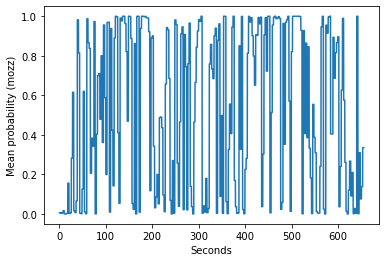

In [7]:
# Latest version from detector_testing_full

# raw = [r'D:\Postdoc\Data\Semi Field Data\UK bednet trial\PHONE A\2020-09-08_19.04.55.928__v0.wav']
# filtered = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\2020-09-08_19.04.55.928__v0.wav']
# TzA = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# TzAraw = [r'D:\Postdoc\Data\Semi Field Data\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# # Confirmed noise (Dav):
dav_noise = [r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise0.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise1.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise2.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise3.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise4.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise5.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise6.wav']




sr = 8000

# Tanzania
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/02-10-2020/'
# subdirectories = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']

directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
subdirectories = ['A1', 'B1']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'

# # # subdirectories = ['A1']
directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'

subdirectories = ['']


# # UK bednet
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/UK bednet trial/'
# subdirectories = ['PHONE A','PHONE B']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/VADout/Semi Field Data/UK bednet trial/'


# Thai
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Data/Thai/'
# subdirectories = ['sounds']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/Thai/'

# directory  = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/music/'
# subdirectories = ['']
# dir_out = directory
# directory = 'F:\Music\Guitar Playthroughs\Audacity'



# directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/2020-11-10/'
# subdirectories = ['0000', '0100', '0200', '0300', '0400', '0500']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/'

#CNN:
to_filter = False
norm = False
step_size= 40
BNN = True
n_samples = 100

if norm:
    mean= np.load('mean_norm.npy')
    std = np.load('std_norm.npy')
else:
    mean = 0
    std = 1

for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = get_wav_for_path([directory + subdir + '/' + filename], sr =8000)
#             print(np.shape(x))
#             X = util.get_feat(x, sr=8000, feat_type=feat_type, flatten = flatten, n_feat=n_feat)
            X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False)
    
            X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
#             X_CNN = (X_CNN - mean)/std
#             print(np.shape(X_CNN))
            
            if BNN:
                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))
                
                G_X, U_X, _ = util.active_BALD(np.log(out), X_CNN, 2)
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0))   
            
            if to_filter:
                preds_filt = np.zeros([len(preds_CNN),2])
                preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                preds_filt[:,0] = 1 - preds_filt[:,1]
                preds_CNN = preds_filt
            
#             preds_list = util.detect_timestamps_BNN(np.repeat(preds_CNN, step_size, axis=0))
            print(preds_list)
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
                                               np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
            plt.xlabel('Seconds')
            plt.ylabel('Mean probability (mozz)')
            plt.show()

                    
            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
            np.savetxt(dir_out + subdir + '/' + 'BNN_step_40_samples_100' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# View predictions for certain features

In [75]:
X_Culex = np.load('proc_data/X_Culex_log-mel-step5.npy')
X_Culex_rest = np.load('proc_data/X_Culex_no_00_log-mel-step5.npy')

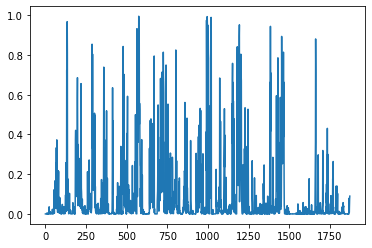

In [76]:
plt.plot(model.predict(X_Culex)[:,1])

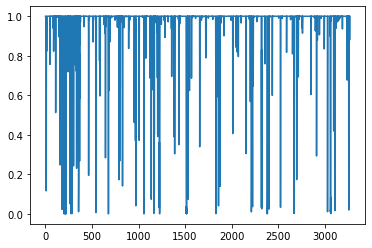

In [77]:
plt.plot(model.predict(X_Culex_rest)[:,1])